In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import datasets
from sklearn import metrics
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [6]:
for col in df.columns:
    print(col,': ',df[col].nunique())

id :  5110
gender :  3
age :  104
hypertension :  2
heart_disease :  2
ever_married :  2
work_type :  5
Residence_type :  2
avg_glucose_level :  3979
bmi :  418
smoking_status :  4
stroke :  2


<AxesSubplot:>

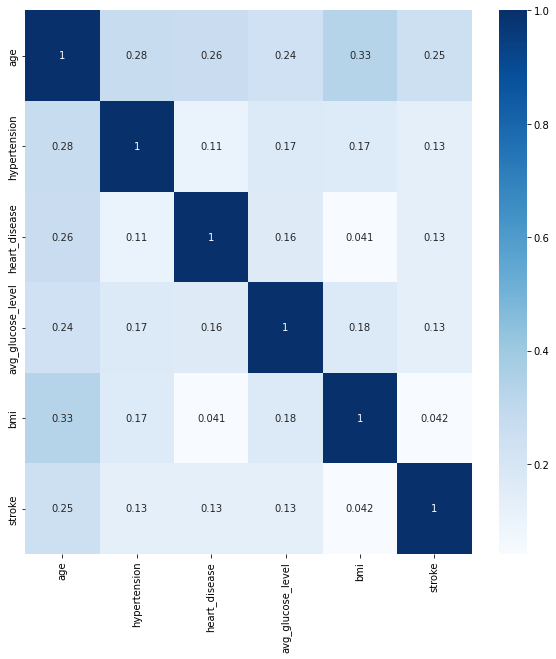

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop('id',axis=1).corr(),annot=True,cmap='Blues')

## Checking for Outliers

In [8]:
df1 = df.copy()

<AxesSubplot:>

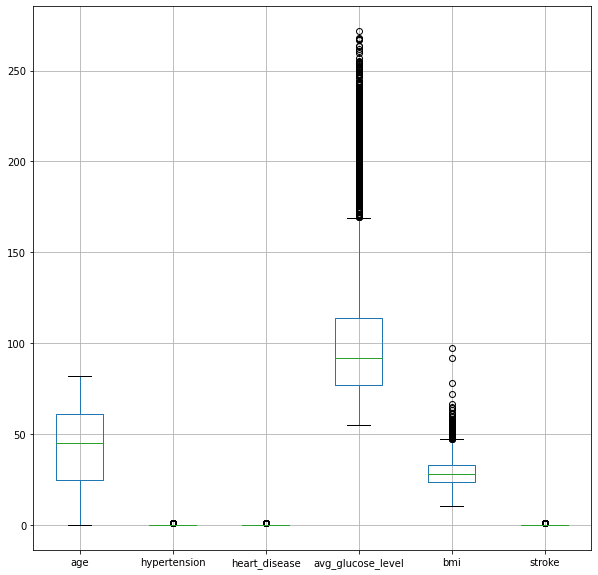

In [9]:
plt.figure(figsize=(10,10))
df1.drop('id',axis=1).boxplot()

<AxesSubplot:xlabel='bmi'>

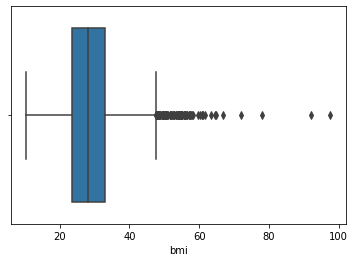

In [10]:
sns.boxplot(x=df['bmi'])

In [11]:
for col in df1[['avg_glucose_level','bmi']]:
    df1 = df1[df1[col]<=df1[col].quantile(0.98)]

<AxesSubplot:xlabel='avg_glucose_level'>

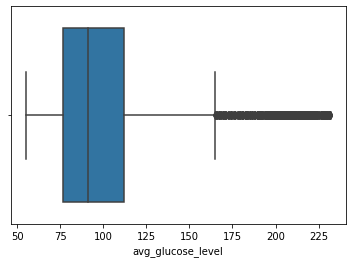

In [12]:
sns.boxplot(x=df1['avg_glucose_level'])

<AxesSubplot:xlabel='bmi'>

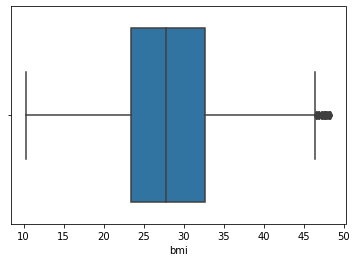

In [13]:
sns.boxplot(x=df1['bmi'])

## Check the dataset if is balanced or not

<AxesSubplot:xlabel='stroke', ylabel='count'>

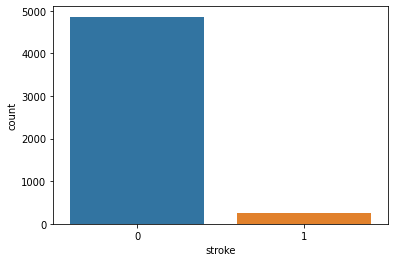

In [14]:
sns.countplot(x=df['stroke'])

# Checking for missing values

In [15]:
df1.isna().mean()*100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

# Feature Engineering

In [16]:
# Droping not important columns
df1.drop('id',axis=1,inplace=True)

In [17]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
one_hot_encoded=pd.get_dummies(df1[['gender','ever_married','work_type','Residence_type','smoking_status']])

In [19]:
df_concat=pd.concat([df1,one_hot_encoded],axis=1)

In [20]:
df_concat.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1,inplace=True)

In [21]:
df_concat

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


# Logistic Regression

In [22]:
X = df_concat.drop('stroke',axis=1)
y = df_concat['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 33)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logreg = LogisticRegression(max_iter = 10e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       942
           1       0.00      0.00      0.00         2

    accuracy                           0.96       944
   macro avg       0.50      0.48      0.49       944
weighted avg       1.00      0.96      0.98       944



In the our classification problem, the data is imbalanced because there are significantly more instances of class 0 compared to class 1. This means that the number of instances in the two classes is not equal, and class 1 is the minority class.

In imbalanced data, performance metrics like accuracy alone can be misleading. Since the majority class (class 0) has a much larger number of instances, a model that always predicts class 0 would achieve a high accuracy even if it fails to correctly predict any instances of the minority class (class 1).

There are several techniques that can be employed to address imbalanced data and improve the performance of models

- Undersampling: This involves reducing the number of instances in the majority class to match the number of instances in the minority class. It helps balance the class distribution but may result in the loss of potentially useful information.
- Oversampling: This involves increasing the number of instances in the minority class to match the number of instances in the majority class. This can be achieved by duplicating existing instances or generating synthetic instances using techniques like Synthetic Minority Over-sampling Technique (SMOTE) or Adaptive Synthetic (ADASYN) sampling. Oversampling helps to create a more balanced dataset and provide more information to the model for the minority class.
- Hybrid Approaches: These combine undersampling and oversampling techniques to balance the dataset effectively. Examples include SMOTEENN and SMOTETomek.

# Undersampling 

In [23]:
test_concat = (df_concat.groupby('stroke', as_index = False)).apply(lambda x: x.sample(n=140)).reset_index(drop = True)

In [24]:
test_concat

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,27.0,0,0,149.95,25.9,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,8.0,0,0,104.30,18.5,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
2,5.0,0,0,122.19,35.0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
3,31.0,0,0,61.10,26.5,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,5.0,0,0,101.31,20.0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,76.0,1,0,194.37,27.0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
276,63.0,0,0,205.35,42.2,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
277,43.0,0,0,143.43,45.9,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
278,68.0,0,1,223.83,31.9,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [25]:
X = test_concat.drop('stroke',axis=1)
y = test_concat['stroke']

# Train Test Split
We will use 50 samples of random state in order to see how important are  the observations by the samples.

In [26]:
X = test_concat.drop('stroke',axis=1)
y = test_concat['stroke']
k = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = i)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    logreg = LogisticRegression(max_iter = 10e5)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    k.append(metrics.accuracy_score(y_test, y_pred))
k    

[0.6964285714285714,
 0.8035714285714286,
 0.8035714285714286,
 0.7857142857142857,
 0.7142857142857143,
 0.7321428571428571,
 0.8035714285714286,
 0.875,
 0.6607142857142857,
 0.8571428571428571,
 0.8035714285714286,
 0.7678571428571429,
 0.7857142857142857,
 0.7142857142857143,
 0.7142857142857143,
 0.6964285714285714,
 0.8035714285714286,
 0.8214285714285714,
 0.75,
 0.8571428571428571,
 0.75,
 0.7321428571428571,
 0.7142857142857143,
 0.75,
 0.7321428571428571,
 0.875,
 0.7678571428571429,
 0.8035714285714286,
 0.8214285714285714,
 0.75,
 0.7678571428571429,
 0.7678571428571429,
 0.8035714285714286,
 0.7678571428571429,
 0.7678571428571429,
 0.8214285714285714,
 0.7678571428571429,
 0.7857142857142857,
 0.7857142857142857,
 0.75,
 0.75,
 0.8035714285714286,
 0.7142857142857143,
 0.6964285714285714,
 0.75,
 0.6964285714285714,
 0.7678571428571429,
 0.75,
 0.7321428571428571,
 0.7857142857142857]

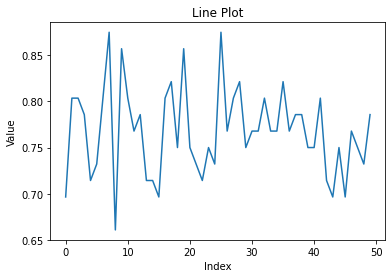

In [27]:
sns.lineplot(data=pd.Series(k))
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot')
plt.show()

- The accuracy scores range from 0.65 to 0.85, indicating that the model's performance varies across different iterations.
- The highest accuracy score achieved is 0.85, while the lowest is 0.65.
- The accuracy scores fluctuate between different iterations, suggesting that the model's performance is sensitive to the random split of the data.

# Stratisfy

In [28]:
X = df_concat.drop('stroke',axis=1)
y = df_concat['stroke']
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.20, random_state=42, stratify= y)

log = LogisticRegression(max_iter = 10e5)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       905
           1       0.00      0.00      0.00        39

    accuracy                           0.96       944
   macro avg       0.48      0.50      0.49       944
weighted avg       0.92      0.96      0.94       944



The logistic regression model trained on the given dataset shows a high accuracy of 96% on the test set. However, it is important to note that the model's performance in predicting the positive class (stroke = 1) is very poor. The model has a precision of 0% and recall of 0% for the positive class, indicating that it fails to correctly identify any instances of stroke in the test set.

This suggests that the logistic regression model is not effectively capturing the patterns and relationships in the data that are related to the occurrence of stroke. It is likely that the class imbalance in the dataset (with a small number of positive instances) is affecting the model's performance. The model is heavily biased towards predicting the majority class (stroke = 0), resulting in a high accuracy but poor performance in detecting stroke cases.

# UnderSampling with RandomUnderSampler

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       895
           1       0.14      0.92      0.25        49

    accuracy                           0.71       944
   macro avg       0.57      0.81      0.54       944
weighted avg       0.95      0.71      0.79       944

AxesSubplot(0.125,0.125;0.775x0.755)


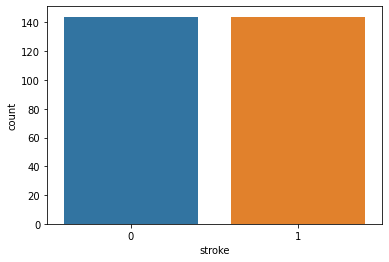

In [29]:
X = df_concat.drop('stroke',axis=1)
y = df_concat['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = RandomUnderSampler(random_state=19)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
logreg = LogisticRegression(max_iter = 10e5)
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(sns.countplot(x=y_resampled))



RandomUnderSampler is similar like the previous technique.Also we see that, it takes only  total 240 observations  in order to balance our target, so it is not the best technique.

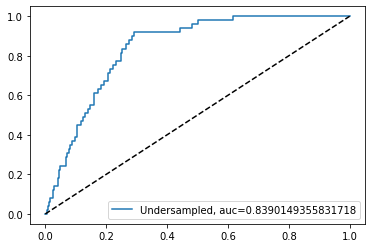

In [30]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc_und= metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr, tpr, label= "Undersampled, auc=" +str(auc_und))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# OverSampling with SMOTE

              precision    recall  f1-score   support

           0       0.99      0.72      0.83       895
           1       0.14      0.86      0.25        49

    accuracy                           0.73       944
   macro avg       0.57      0.79      0.54       944
weighted avg       0.95      0.73      0.80       944

AxesSubplot(0.125,0.125;0.775x0.755)


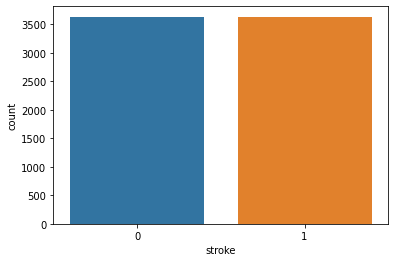

In [31]:
X = df_concat.drop('stroke',axis=1)
y = df_concat['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
smote = SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=5,)
X_resampled1, y_resampled1 = smote.fit_resample(X_train, y_train)
logreg = LogisticRegression(max_iter = 10e5)
logreg.fit(X_resampled1, y_resampled1)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(sns.countplot(x=y_resampled1))

the model trained using SMOTE oversampling technique shows a high ability to identify non-stroke cases (class 0) but struggles in correctly identifying stroke cases (class 1). This imbalance in performance is likely due to the imbalanced nature of the dataset. Further improvements might be achieved by addressing the class imbalance issue through techniques like adjusting class weights, using different sampling strategies, or exploring other algorithms specifically designed for imbalanced datasets.

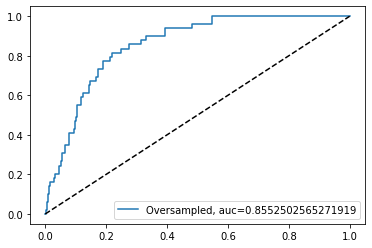

In [32]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr_o,tpr_o,_ = metrics.roc_curve(y_test,y_pred_proba)
auc_over= metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr_o, tpr_o, label= "Oversampled, auc=" +str(auc_over))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# Combination of UnderSampling and OverSampling

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       179
           1       0.71      0.95      0.82        21

    accuracy                           0.95       200
   macro avg       0.85      0.95      0.90       200
weighted avg       0.96      0.95      0.96       200

AxesSubplot(0.125,0.125;0.775x0.755)


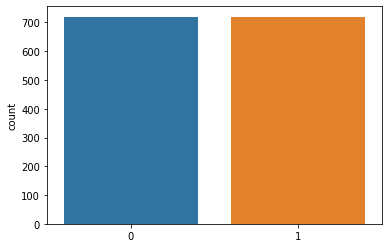

In [33]:
X = df_concat.drop('stroke',axis=1)
y = df_concat['stroke']

X, y = make_classification(
    n_samples=1000, n_features=X.shape[1], n_informative=2,
    n_redundant=10, n_clusters_per_class=1, weights=[0.9], random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_res, y_res)

y_pred = logreg.predict(X_test)

classification_results = classification_report(y_test, y_pred)
confusion_results = confusion_matrix(y_test, y_pred)
print(classification_results)
print(sns.countplot(x=y_res))

Based on the classification report, the model shows promising results. It achieves a high accuracy of 95% on the testing set. The model demonstrates good performance in terms of precision and recall for both the majority class (0 - non-stroke) and the minority class (1 - stroke). However, it is important to note that the number of samples for the minority class is relatively small (21), which may affect the stability of the evaluation metrics. 

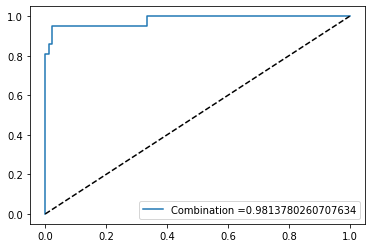

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr_c,tpr_c,_ = metrics.roc_curve(y_test,y_pred_proba)
auc_comb= metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr_c, tpr_c, label= "Combination =" +str(auc_comb))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

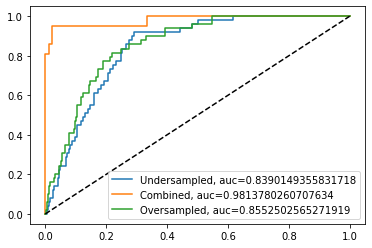

In [35]:
# ROC for all models

plt.plot(fpr, tpr, label= "Undersampled, auc=" +str(auc_und))
plt.plot(fpr_c, tpr_c, label= "Combined, auc=" +str(auc_comb))
plt.plot(fpr_o, tpr_o, label= "Oversampled, auc=" +str(auc_over))

plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# A simple way to find  the  best features

In [36]:
X = df_concat.drop('stroke', axis=1)
y = df_concat['stroke']
import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.135654
         Iterations: 35
                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.206     
Dependent Variable:           stroke                     AIC:                        1314.5706 
Date:                         2023-06-10 18:22           BIC:                        1424.3832 
No. Observations:             4720                       Log-Likelihood:             -640.29   
Df Model:                     16                         LL-Null:                    -806.00   
Df Residuals:                 4703                       LLR p-value:                7.6639e-61
Converged:                    0.0000                     Scale:                      1.0000    
No. Iterations:               35.0000                                                          
-----------------------------------------------------------------------------------------------
               

C:\Users\petro\anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


To determine the most important features based on the p-values (P>|z|) in the logistic regression model, we look for features with p-values that are statistically significant (typically below a certain threshold, such as 0.05).

From the provided results, the features with p-values less than 0.05 are considered statistically significant and can be considered important. In this case, the following features are statistically significant:

- age (p-value: 0.0000)
- hypertension (p-value: 0.0107)
- avg_glucose_level (p-value: 0.0015)

These features have p-values less than 0.05, indicating that they have a statistically significant relationship with the target variable (stroke). Therefore, they can be considered the most important features in the logistic regression model based on the provided results.